# **Mini Project-Mental Disorder Classification**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv(r"C:\Users\Administrator\OneDrive\Desktop\MLDS\Project\Dataset-Mental-Disorders.csv")
df.head(10)

,Patient Number,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,Patiant-01,Usually,Seldom,Sometimes,Sometimes,YES,YES,NO,NO,YES,NO,NO,YES,YES,YES,3 From 10,3 From 10,4 From 10,Bipolar Type-2
1,Patiant-02,Usually,Seldom,Usually,Sometimes,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,4 From 10,2 From 10,5 From 10,Depression
2,Patiant-03,Sometimes,Most-Often,Sometimes,Sometimes,YES,NO,NO,NO,YES,YES,NO,YES,YES,NO,6 From 10,5 From 10,7 From 10,Bipolar Type-1
3,Patiant-04,Usually,Seldom,Usually,Most-Often,YES,YES,YES,NO,YES,NO,NO,NO,NO,NO,3 From 10,2 From 10,2 From 10,Bipolar Type-2
4,Patiant-05,Usually,Usually,Sometimes,Sometimes,NO,NO,NO,NO,NO,NO,NO,YES,YES,YES,5 From 10,5 From 10,6 From 10,Normal
5,Patiant-06,Usually,Sometimes,Sometimes,Most-Often,NO,YES,YES,YES,NO,NO,NO,NO,YES,NO,3 From 10,5 From 10,5 From 10,Depression
6,Patiant-07,Seldom,Usually,Seldom,Sometimes,YES,YES,YES,NO,YES,YES,NO,YES,YES,YES,7 From 10,2 From 10,9 From 10,Bipolar Type-1
7,Patiant-08,Usually,Sometimes,Sometimes,Sometimes,NO,NO,NO,NO,YES,NO,NO,NO,NO,YES,5 From 10,5 From 10,5 From 10,Normal
8,Patiant-09,Most-Often,Seldom,Most-Often,Usually,YES,YES,YES,NO,YES,YES,NO,YES,NO,NO,8 From 10,2 From 10,3 From 10,Bipolar Type-2
9,Patiant-10,Usually,Seldom,Most-Often,Sometimes,NO,NO,NO,NO,YES,NO,NO,YES,YES,YES,3 From 10,4 From 10,2 From 10,Depression


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Patient Number       120 non-null    object
 1   Sadness              120 non-null    object
 2   Euphoric             120 non-null    object
 3   Exhausted            120 non-null    object
 4   Sleep dissorder      120 non-null    object
 5   Mood Swing           120 non-null    object
 6   Suicidal thoughts    120 non-null    object
 7   Anorxia              120 non-null    object
 8   Authority Respect    120 non-null    object
 9   Try-Explanation      120 non-null    object
 10  Aggressive Response  120 non-null    object
 11  Ignore & Move-On     120 non-null    object
 12  Nervous Break-down   120 non-null    object
 13  Admit Mistakes       120 non-null    object
 14  Overthinking         120 non-null    object
 15  Sexual Activity      120 non-null    object
 16  Concentr

## Treat Null Values

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.isnull().sum()

Patient Number         0
Sadness                0
Euphoric               0
Exhausted              0
Sleep dissorder        0
Mood Swing             0
Suicidal thoughts      0
Anorxia                0
Authority Respect      0
Try-Explanation        0
Aggressive Response    0
Ignore & Move-On       0
Nervous Break-down     0
Admit Mistakes         0
Overthinking           0
Sexual Activity        0
Concentration          0
Optimisim              0
Expert Diagnose        0
dtype: int64

In [7]:
df['Patient Number']=df['Patient Number'].str.split('-').str[1]
df['Patient Number']=df['Patient Number'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Patient Number       120 non-null    int64 
 1   Sadness              120 non-null    object
 2   Euphoric             120 non-null    object
 3   Exhausted            120 non-null    object
 4   Sleep dissorder      120 non-null    object
 5   Mood Swing           120 non-null    object
 6   Suicidal thoughts    120 non-null    object
 7   Anorxia              120 non-null    object
 8   Authority Respect    120 non-null    object
 9   Try-Explanation      120 non-null    object
 10  Aggressive Response  120 non-null    object
 11  Ignore & Move-On     120 non-null    object
 12  Nervous Break-down   120 non-null    object
 13  Admit Mistakes       120 non-null    object
 14  Overthinking         120 non-null    object
 15  Sexual Activity      120 non-null    object
 16  Concentr

In [8]:
col_from=df[["Sexual Activity","Concentration","Optimisim"]]
for i in col_from:
    df[i]=df[i].str.split(' ').str[0]
    df[i]=df[i].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Patient Number       120 non-null    int64 
 1   Sadness              120 non-null    object
 2   Euphoric             120 non-null    object
 3   Exhausted            120 non-null    object
 4   Sleep dissorder      120 non-null    object
 5   Mood Swing           120 non-null    object
 6   Suicidal thoughts    120 non-null    object
 7   Anorxia              120 non-null    object
 8   Authority Respect    120 non-null    object
 9   Try-Explanation      120 non-null    object
 10  Aggressive Response  120 non-null    object
 11  Ignore & Move-On     120 non-null    object
 12  Nervous Break-down   120 non-null    object
 13  Admit Mistakes       120 non-null    object
 14  Overthinking         120 non-null    object
 15  Sexual Activity      120 non-null    int64 
 16  Concentr

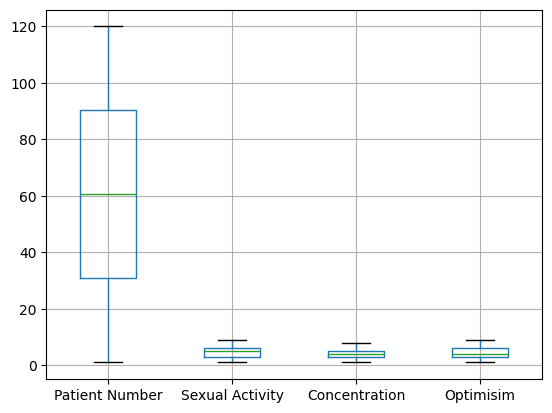

In [9]:
df.boxplot()
plt.show()

In [10]:
df.head()

,Patient Number,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,1,Usually,Seldom,Sometimes,Sometimes,YES,YES,NO,NO,YES,NO,NO,YES,YES,YES,3,3,4,Bipolar Type-2
1,2,Usually,Seldom,Usually,Sometimes,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,4,2,5,Depression
2,3,Sometimes,Most-Often,Sometimes,Sometimes,YES,NO,NO,NO,YES,YES,NO,YES,YES,NO,6,5,7,Bipolar Type-1
3,4,Usually,Seldom,Usually,Most-Often,YES,YES,YES,NO,YES,NO,NO,NO,NO,NO,3,2,2,Bipolar Type-2
4,5,Usually,Usually,Sometimes,Sometimes,NO,NO,NO,NO,NO,NO,NO,YES,YES,YES,5,5,6,Normal


## Encode Categorical Data

In [11]:
cat_col=df.select_dtypes(include='object').columns
cat_col

Index(['Sadness', 'Euphoric', 'Exhausted', 'Sleep dissorder', 'Mood Swing',
       'Suicidal thoughts', 'Anorxia', 'Authority Respect', 'Try-Explanation',
       'Aggressive Response', 'Ignore & Move-On', 'Nervous Break-down',
       'Admit Mistakes', 'Overthinking', 'Expert Diagnose'],
      dtype='object')

In [12]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for column in cat_col:
 # Fit and transform the column
    df[column] = label_encoder.fit_transform(df[column])
    df[column]=df[column].astype(int)
 # Print the mapping for each category
    categories = df[column].unique()
    print(f"{column} - ")
    for category in categories:
        print(f"{category} : {label_encoder.inverse_transform([category])[0]}")
df.info()

Sadness - 
3 : Usually
2 : Sometimes
1 : Seldom
0 : Most-Often
Euphoric - 
1 : Seldom
0 : Most-Often
3 : Usually
2 : Sometimes
Exhausted - 
2 : Sometimes
3 : Usually
1 : Seldom
0 : Most-Often
Sleep dissorder - 
2 : Sometimes
0 : Most-Often
3 : Usually
1 : Seldom
Mood Swing - 
1 : YES
0 : NO
Suicidal thoughts - 
2 : YES 
1 : YES
0 : NO
Anorxia - 
0 : NO
1 : YES
Authority Respect - 
0 : NO
1 : YES
Try-Explanation - 
1 : YES
0 : NO
Aggressive Response - 
0 : NO
1 : YES
Ignore & Move-On - 
0 : NO
1 : YES
Nervous Break-down - 
1 : YES
0 : NO
Admit Mistakes - 
1 : YES
0 : NO
Overthinking - 
1 : YES
0 : NO
Expert Diagnose - 
1 : Bipolar Type-2
2 : Depression
0 : Bipolar Type-1
3 : Normal
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Patient Number       120 non-null    int64
 1   Sadness              120 non-null    int64
 2   Euphoric

In [13]:
df["Suicidal thoughts"].value_counts()

Suicidal thoughts
0    63
1    56
2     1
Name: count, dtype: int64

In [14]:
df.loc[df["Suicidal thoughts"]>1,"Suicidal thoughts"]=1
df["Suicidal thoughts"].value_counts()

Suicidal thoughts
0    63
1    57
Name: count, dtype: int64

In [15]:
df.head(10)

,Patient Number,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,1,3,1,2,2,1,1,0,0,1,0,0,1,1,1,3,3,4,1
1,2,3,1,3,2,0,1,0,0,0,0,0,0,0,0,4,2,5,2
2,3,2,0,2,2,1,0,0,0,1,1,0,1,1,0,6,5,7,0
3,4,3,1,3,0,1,1,1,0,1,0,0,0,0,0,3,2,2,1
4,5,3,3,2,2,0,0,0,0,0,0,0,1,1,1,5,5,6,3
5,6,3,2,2,0,0,1,1,1,0,0,0,0,1,0,3,5,5,2
6,7,1,3,1,2,1,1,1,0,1,1,0,1,1,1,7,2,9,0
7,8,3,2,2,2,0,0,0,0,1,0,0,0,0,1,5,5,5,3
8,9,0,1,0,3,1,1,1,0,1,1,0,1,0,0,8,2,3,1
9,10,3,1,0,2,0,0,0,0,1,0,0,1,1,1,3,4,2,2


## Check Correlation

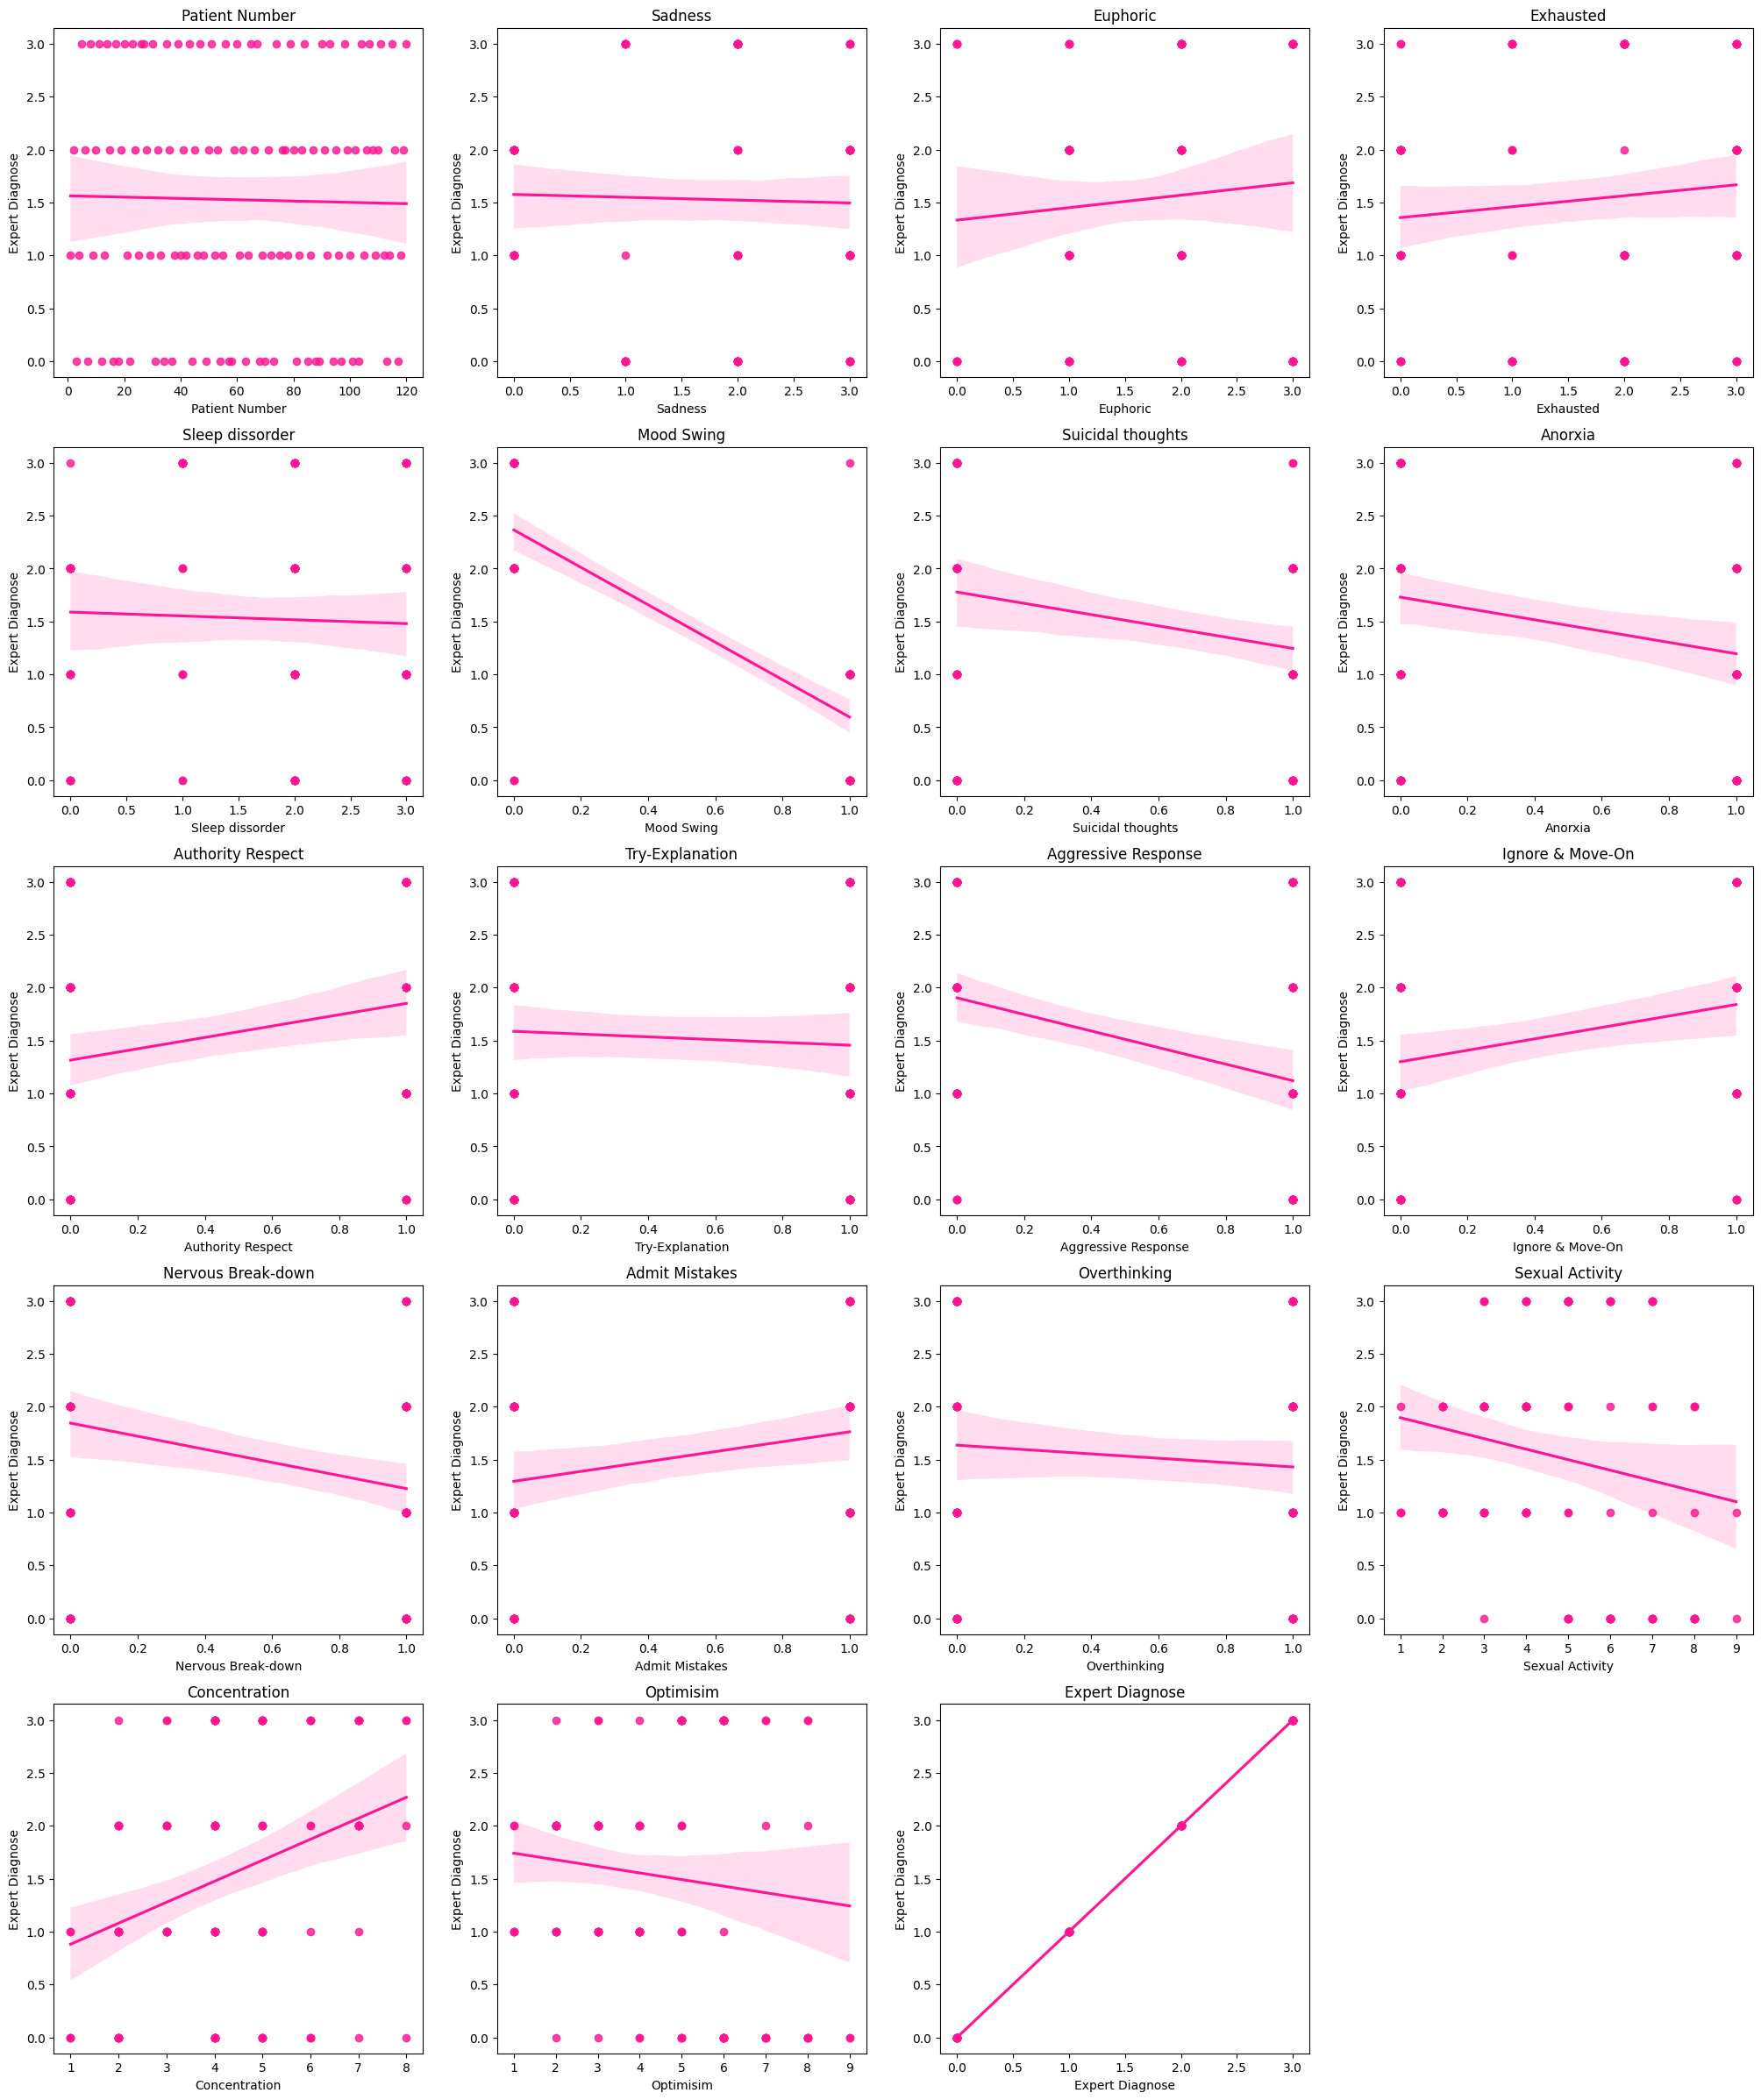

In [16]:
num_col=df.select_dtypes(include=['number']).columns
plt.figure(figsize=(25, 30))
for idx, i in enumerate(num_col, 1):  # Use enumerate for indexing
    plt.subplot(5, 4, idx)  # Correct subplot indexing
    sns.regplot(df, x=i, y="Expert Diagnose",color="deeppink")
    plt.title(i)  # Add title to each subplot
plt.show()

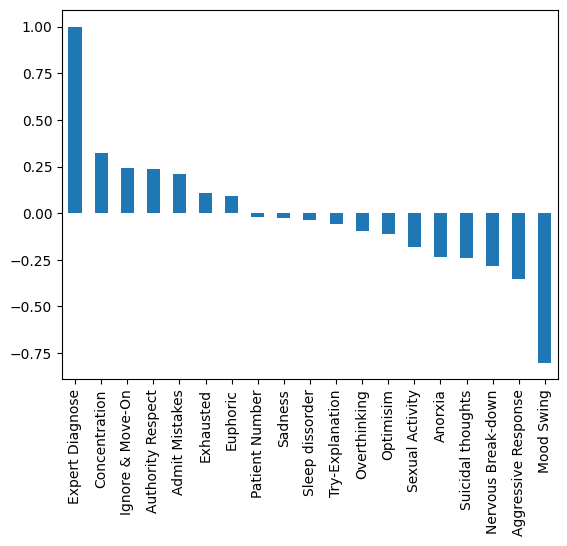

In [17]:
df.corr()["Expert Diagnose"].sort_values(ascending=False).plot(kind="bar")
plt.show()

## Split DataSet

In [18]:
# Split DataSet into Training 80% & testing 20%
X=df[["Mood Swing","Concentration","Aggressive Response"]]
y=df["Expert Diagnose"] 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.10,random_state=49)

In [19]:
y.value_counts()

Expert Diagnose
1    31
2    31
3    30
0    28
Name: count, dtype: int64

## Apply ML Models

In [20]:
# Create Classification Models
LR = LogisticRegression(random_state=49)
KNN = KNeighborsClassifier()
DT = DecisionTreeClassifier(random_state=49)
RF = RandomForestClassifier(random_state=49)
GBR = GradientBoostingClassifier(random_state=49)
Models = {'LR': LR, 'KNN': KNN, 'DT': DT, 'RF': RF, 'GBR': GBR}
# Apply Models
for Model_name, Model in Models.items():
    Model.fit(x_train, y_train)
    y_pred = Model.predict(x_test)  # Now y_pred will have discrete class labels
    train = Model.score(x_train, y_train)
    test = Model.score(x_test, y_test)  # Fixed variable name to lowercase
 # Classification Metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    cm = confusion_matrix(y_test, y_pred)
    print(Model_name)
    print(f"Training Score : {train:.2f}")  # Fixed indentation
    print(f"Testing  Score : {test:.2f}")   # Fixed indentation
    print(f"Accuracy: {accuracy:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print("Confusion Matrix:")
    print(cm)
    print('--------------------------------------------------')

LR
Training Score : 0.56
Testing  Score : 0.42
Accuracy: 0.42
F1 Score: 0.42
Confusion Matrix:
[[1 1 0 1]
 [1 1 0 0]
 [0 0 2 0]
 [0 0 4 1]]
--------------------------------------------------
KNN
Training Score : 0.60
Testing  Score : 0.58
Accuracy: 0.58
F1 Score: 0.56
Confusion Matrix:
[[1 1 1 0]
 [1 1 0 0]
 [0 0 2 0]
 [0 0 2 3]]
--------------------------------------------------
DT
Training Score : 0.66
Testing  Score : 0.67
Accuracy: 0.67
F1 Score: 0.69
Confusion Matrix:
[[3 0 0 0]
 [0 2 0 0]
 [0 0 2 0]
 [1 0 3 1]]
--------------------------------------------------
RF
Training Score : 0.66
Testing  Score : 0.92
Accuracy: 0.92
F1 Score: 0.94
Confusion Matrix:
[[3 0 0 0]
 [0 2 0 0]
 [0 0 2 0]
 [1 0 0 4]]
--------------------------------------------------
GBR
Training Score : 0.66
Testing  Score : 0.83
Accuracy: 0.83
F1 Score: 0.85
Confusion Matrix:
[[2 0 0 1]
 [0 2 0 0]
 [0 0 2 0]
 [0 0 1 4]]
--------------------------------------------------


## Manual Predictions

In [21]:
df.head()[["Mood Swing","Concentration","Aggressive Response","Expert Diagnose"]]

,Mood Swing,Concentration,Aggressive Response,Expert Diagnose
0,1,3,0,1
1,0,2,0,2
2,1,5,1,0
3,1,2,0,1
4,0,5,0,3


In [22]:
# Random Forest Perform well
y_pred1=RF.predict([[1,3,0]]) # "Mood Swing" b,"Concentration" 1-5,"Aggressive Response"b
print("1:",y_pred1)
y_pred2=RF.predict([[0,2,0]]) 
print("2:",y_pred2)
y_pred3=RF.predict([[1,5,1]]) 
print("3:",y_pred3)
y_pred4=RF.predict([[1,2,0]]) # 
print("4:",y_pred4)
y_pred5=RF.predict([[0,5,0]]) # 
print("5:",y_pred5)

1: [1]
2: [2]
3: [0]
4: [1]
5: [3]


Got 100 % correct predections

In [23]:
import pickle

# Save the model to a .pkl file
with open("Mental_health_pred.pkl", "wb") as f:
    pickle.dump(RF, f)

print("Model saved as Mental_health_pred.pkl")

Model saved as Mental_health_pred.pkl


In [24]:
# Load the model
with open("Mental_health_pred.pkl", "rb") as f:
    loaded_model = pickle.load(f)

# Test prediction
sample_input = [[1,3,0]]  # Replace with actual feature values
prediction = loaded_model.predict(sample_input)
print("Prediction:", prediction)

Prediction: [1]
